In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

# nacitanie dat

In [2]:
data=pd.read_csv("mall_customers.csv",sep=";")

In [3]:
print(data)

    Age  Annual Income (k$)  Spending Score (1-100)
0    19                  15                      39
1    21                  15                      81
2    64                  19                       3
3    67                  19                      14
4    37                  20                      13
..  ...                 ...                     ...
83   28                 101                      68
84   33                 113                       8
85   32                 126                      74
86   32                 137                      18
87   30                 137                      83

[88 rows x 3 columns]


# normalizacia + reskalovanie

In [4]:
def normalize(x,xmin,xmax):
    nx=x.clone().detach()
    nx=(nx-xmin)/(xmax-xmin)
    return nx

In [5]:
def rescale(x,x_min,x_max):
    sx=x.clone().detach()
    sx=sx*(x_max-x_min)+x_min
    return sx

# vizualizacia

In [6]:
inputs=(torch.Tensor(data['Age'].to_numpy()),torch.Tensor(data['Annual Income (k$)'].to_numpy()))
targets=torch.Tensor(data['Spending Score (1-100)'].to_numpy())

In [7]:
print(min(inputs[0]),max(inputs[0]))
print(min(inputs[1]),max(inputs[1]))
print(min(targets),max(targets))

tensor(18.) tensor(70.)
tensor(15.) tensor(137.)
tensor(1.) tensor(97.)


In [8]:
ninputs=(normalize(inputs[0],18,70), normalize(inputs[1],15,137))
ntargets=normalize(targets,1,97)

Text(0.5, 0, 'salary')

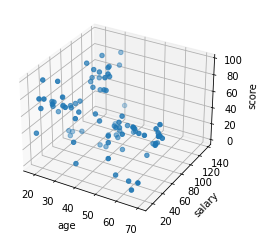

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
ax.scatter(xs = data['Age'], ys = data['Annual Income (k$)'], zs = data['Spending Score (1-100)'])
ax.set_zlabel("score")
ax.set_xlabel("age")
ax.set_ylabel("salary")

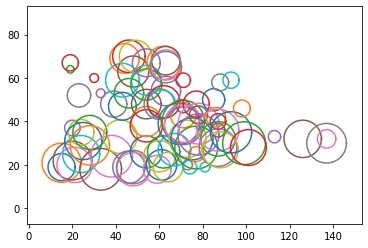

In [10]:
an = np.linspace(0, 2 * np.pi, 100)

for i in range(len(ntargets)) :
    plt.plot( data['Spending Score (1-100)'][i]**0.5* np.cos(an)+data['Annual Income (k$)'][i], data['Spending Score (1-100)'][i]**0.5 * np.sin(an)+data['Age'][i])

plt.axis('equal')

plt.show()

# trening modelu

In [11]:
def create_random_model():
    w1=torch.rand(1,requires_grad=True) 
    w2=torch.rand(1,requires_grad=True)    
    b=torch.rand(1,requires_grad=True)
    return (w1,w2,b)

In [12]:
def use_model(i,m):
    w1,w2,b=m
    return i[0]*w1+i[1]*w2+b

In [13]:
def MSE(t1,t2):#mean squared error
    diff=t1-t2
    sum_all=torch.sum(diff*diff)
    average_diff = sum_all/diff.numel()
    #numel=pocet elem
    return average_diff

In [14]:
def train(inputs,targets,model,epochs,l_rate=0.005):
    losses=[]
    for i in range(epochs):
        preds=use_model(inputs,model)
        loss=MSE(preds,targets)
        loss.backward()
        loss_value=loss.item()#z torch do cisla
        losses.append(loss_value)
        with torch.no_grad():
            w1,w2,b=model
            w1-=w1.grad*l_rate
            w2-=w2.grad*l_rate   
            b-=b.grad*l_rate
            w1.grad.zero_()# vynul gradientu  
            w2.grad.zero_()# vynul gradientu    
            b.grad.zero_()# vynul gradientu
    return losses

In [15]:
model1=create_random_model()
loss=train(ninputs,ntargets,model1,15000)

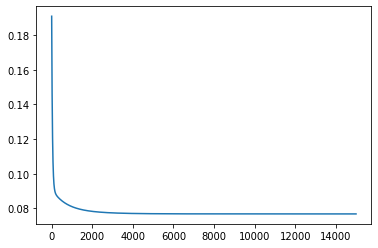

In [16]:
plt.plot(loss)

In [17]:
print(model1)

(tensor([-0.2766], requires_grad=True), tensor([-0.0656], requires_grad=True), tensor([0.6363], requires_grad=True))


In [19]:
print(loss[-1])

0.07674819976091385


learning rate som si dal na 0.005
dal som 15k epoch ale asi bz stacilo aj menej
priemerna chyba modelu je 0.0767
uprimner neviem ako moc je moje riesenie dobre ale predpovede su docela blizko realite


In [20]:
preds=use_model(ninputs,model1)

In [22]:
preds=rescale(preds,1,97)

In [35]:
(sum(abs(preds-data['Spending Score (1-100)'].to_numpy()))/88).item()

22.06026202982122

priemerna chyba je 22 co je dost zo 100
to nie je ani inzinierska presnost

nemyslim si ze ten model funguje moc dobre

In [36]:
preds[0]

tensor(61.5710)